# House Price Prediction với Machine Learning

## Mục tiêu
Dự đoán giá nhà dựa trên diện tích, số phòng, vị trí sử dụng các mô hình:
- **Linear Regression**
- **Ridge Regression**
- **Lasso Regression**

## Dataset
**California Housing** từ sklearn - chứa thông tin về giá nhà ở California

---
## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Settings
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("Libraries imported successfully!")

Libraries imported successfully!


---
## 2. Load & Explore Data

In [2]:
# Load California Housing dataset
california = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target  # Target variable (in $100,000)

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nFeatures: {california.feature_names}")
print(f"\nTarget: Price (median house value in $100,000)")

Dataset Info:
Shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Target: Price (median house value in $100,000)


In [3]:
# Display first 10 rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [4]:
# Data types and info
print("Data Types:")
df.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe().round(2)

Statistical Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [6]:
# Check for missing values
print("Missing Values:")
missing = df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

Total missing values: 0


### Feature Description

| Feature | Description |
|---------|-------------|
| MedInc | Median income trong block group |
| HouseAge | Tuổi trung bình của nhà trong block group |
| AveRooms | Số phòng trung bình trên mỗi hộ gia đình |
| AveBedrms | Số phòng ngủ trung bình trên mỗi hộ gia đình |
| Population | Dân số của block group |
| AveOccup | Số thành viên trung bình trên mỗi hộ gia đình |
| Latitude | Vĩ độ - vị trí địa lý |
| Longitude | Kinh độ - vị trí địa lý |
| Price | Giá nhà trung bình (đơn vị: $100,000) |

---
## 3. Data Visualization

### 3.1 Distribution của Target Variable (Price)

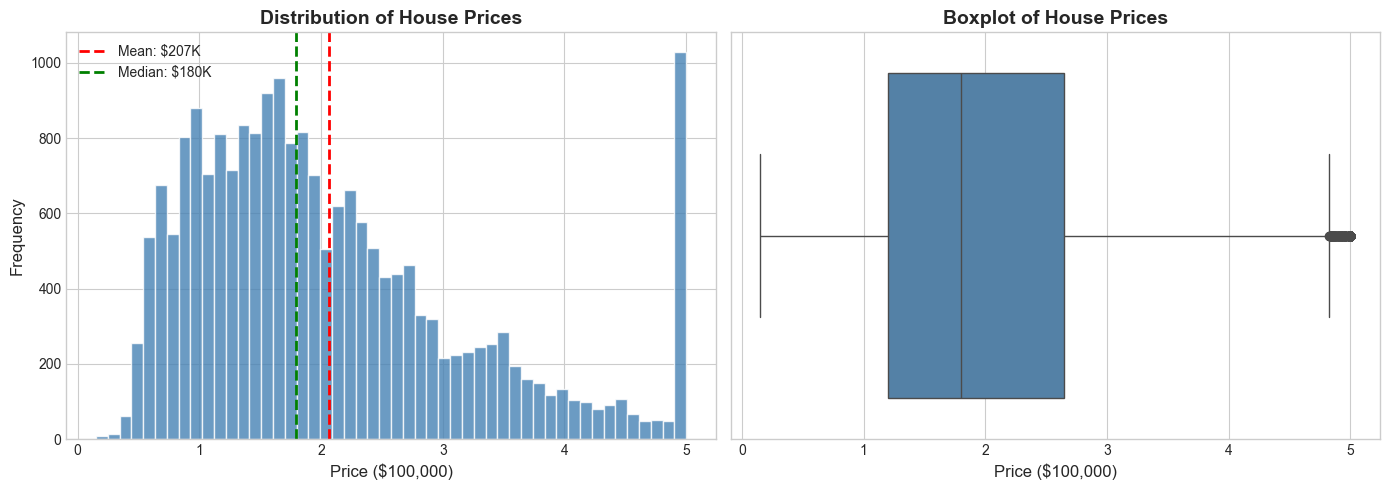


Observations:
   - Mean Price: $206.86K
   - Median Price: $179.70K
   - Price range: $15.00K - $500.00K


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Price'], bins=50, color='steelblue', edgecolor='white', alpha=0.8)
axes[0].set_xlabel('Price ($100,000)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].axvline(df['Price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Price"].mean()*100:.0f}K')
axes[0].axvline(df['Price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["Price"].median()*100:.0f}K')
axes[0].legend()

# Box plot
sns.boxplot(x=df['Price'], ax=axes[1], color='steelblue')
axes[1].set_xlabel('Price ($100,000)', fontsize=12)
axes[1].set_title('Boxplot of House Prices', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nObservations:")
print(f"   - Mean Price: ${df['Price'].mean()*100:.2f}K")
print(f"   - Median Price: ${df['Price'].median()*100:.2f}K")
print(f"   - Price range: ${df['Price'].min()*100:.2f}K - ${df['Price'].max()*100:.2f}K")

### 3.2 Correlation Heatmap

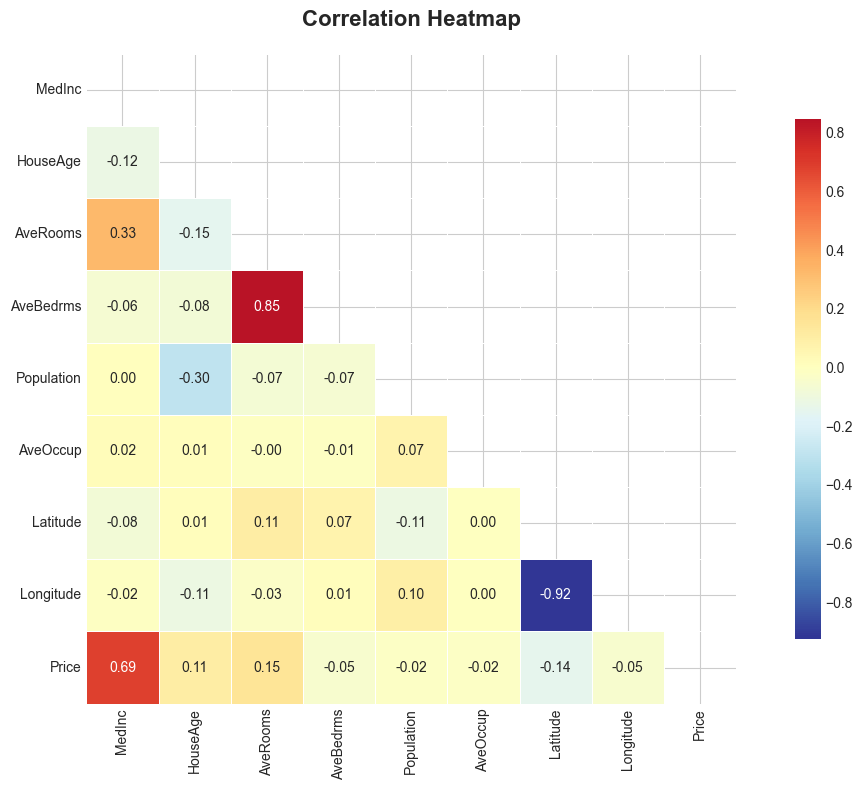


Correlation với Price:
   MedInc: 0.688 (Strong Positive)
   AveRooms: 0.152 (Weak Positive)
   HouseAge: 0.106 (Weak Positive)
   AveOccup: -0.024 (Weak Negative)
   Population: -0.025 (Weak Negative)
   Longitude: -0.046 (Weak Negative)
   AveBedrms: -0.047 (Weak Negative)
   Latitude: -0.144 (Weak Negative)


In [8]:
plt.figure(figsize=(12, 8))

# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show correlations with Price
print("\nCorrelation với Price:")
price_corr = corr_matrix['Price'].drop('Price').sort_values(ascending=False)
for feature, corr in price_corr.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"   {feature}: {corr:.3f} ({strength} {direction})")

### 3.3 Feature Distributions

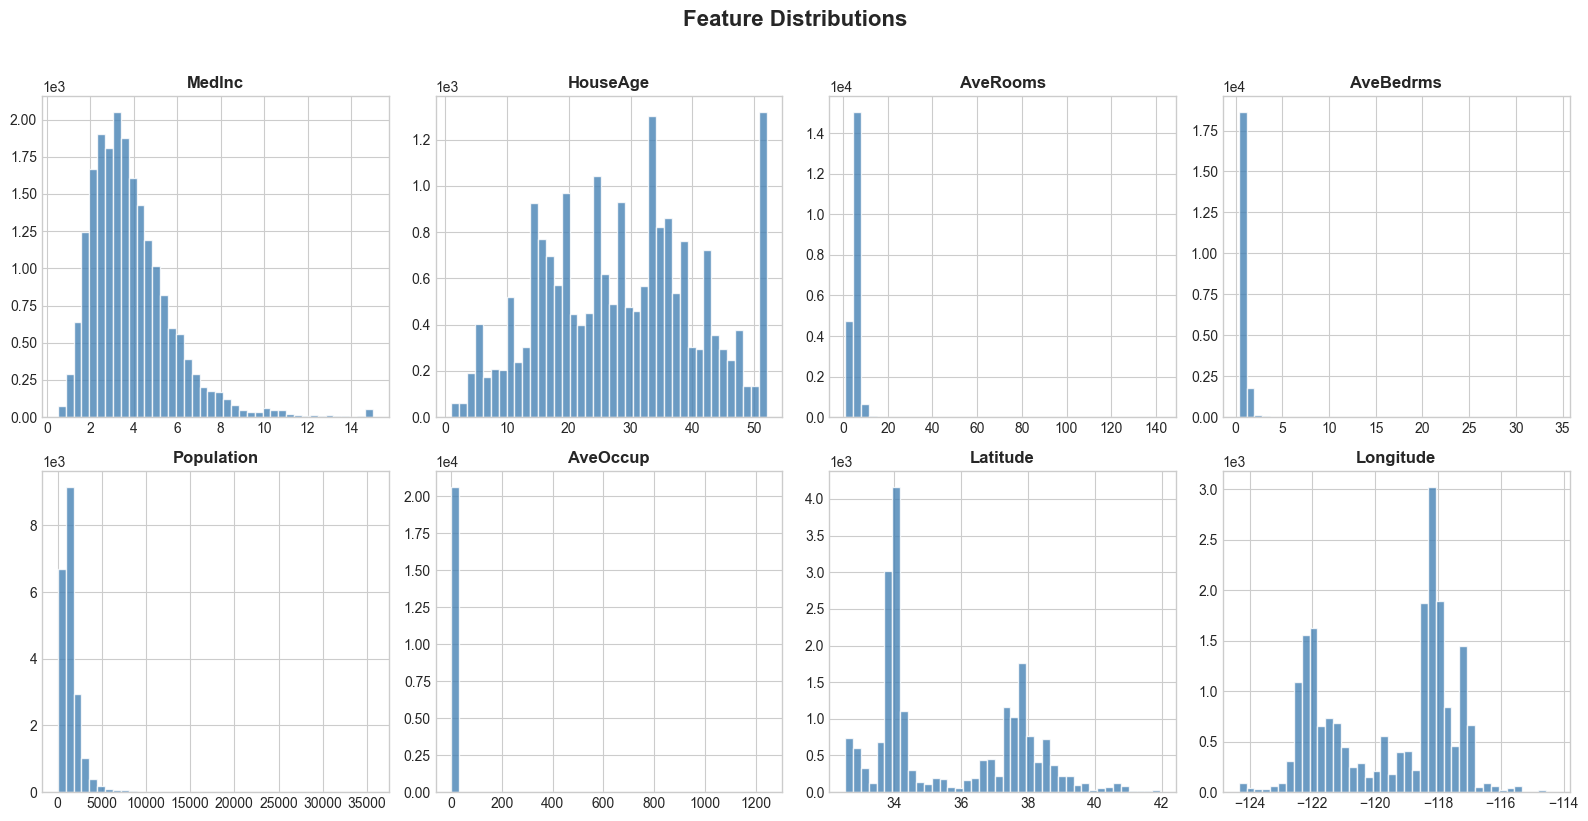

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

features = df.columns[:-1]  # All features except Price

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=40, color='steelblue', edgecolor='white', alpha=0.8)
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.4 Key Features vs Price

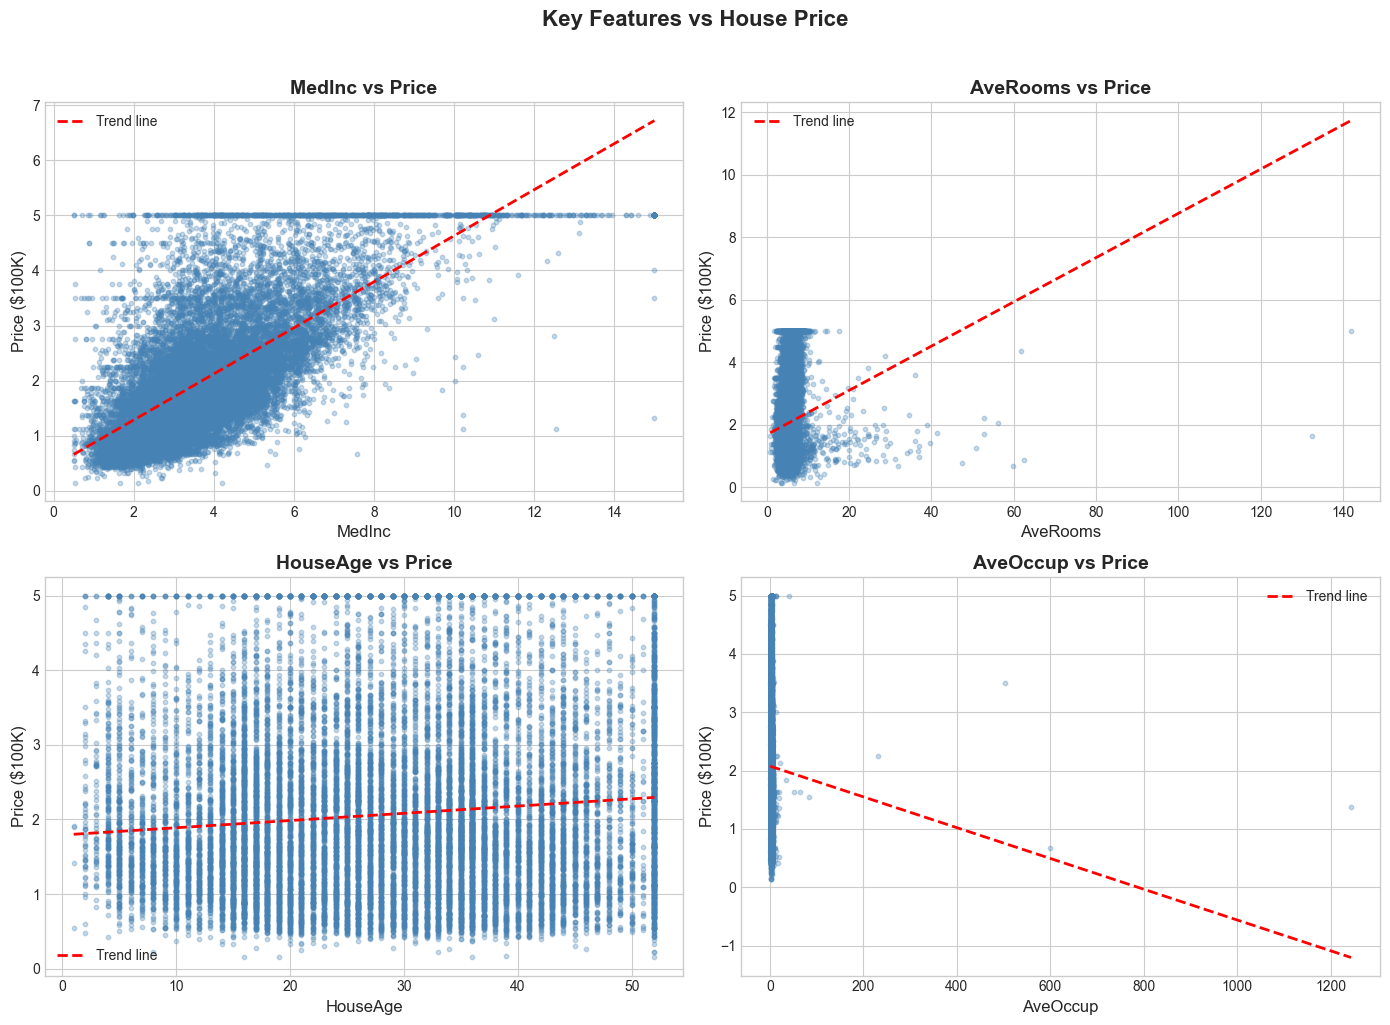

In [10]:
# Select key features based on correlation
key_features = ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    axes[i].scatter(df[feature], df['Price'], alpha=0.3, s=10, c='steelblue')
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Price ($100K)', fontsize=12)
    axes[i].set_title(f'{feature} vs Price', fontsize=14, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(df[feature], df['Price'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[i].plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend line')
    axes[i].legend()

plt.suptitle('Key Features vs House Price', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.5 Geographic Distribution

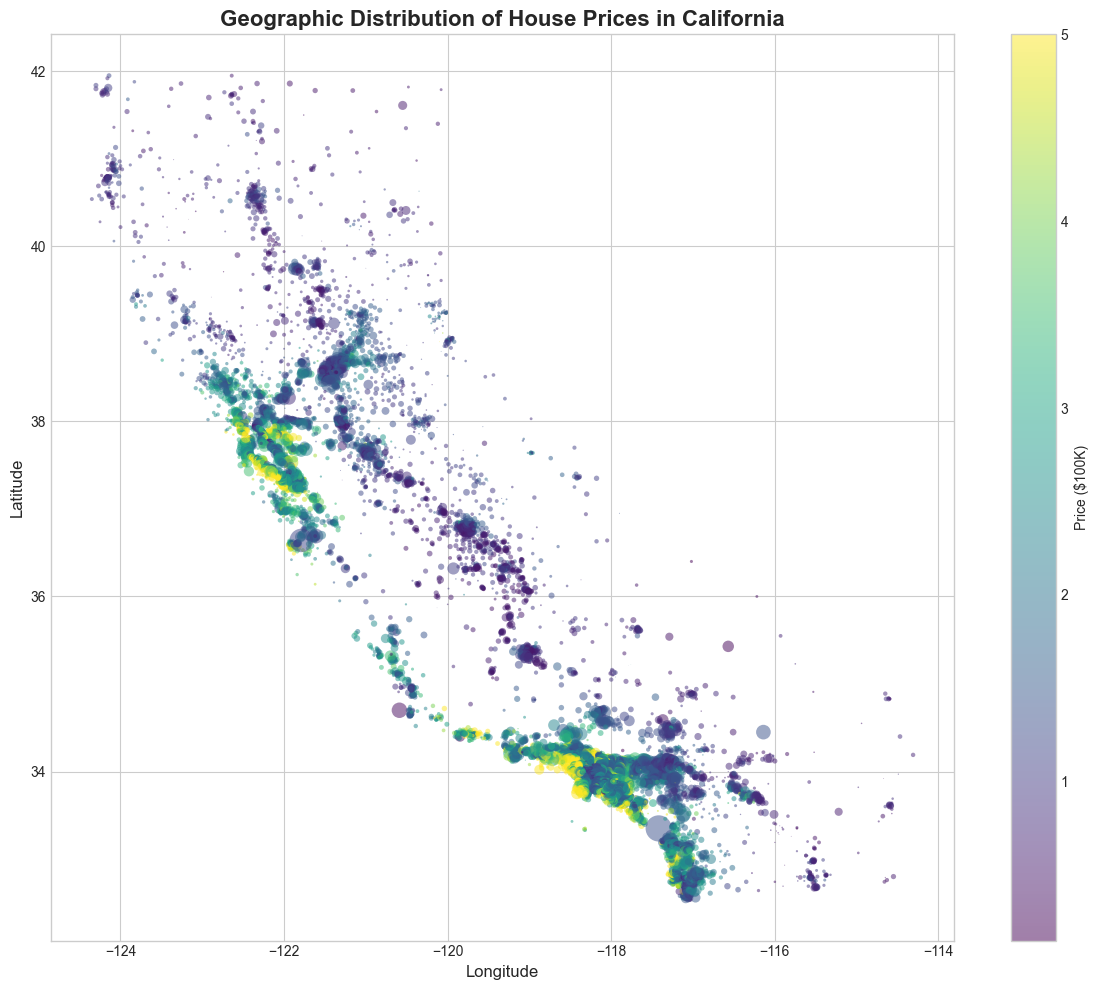

Note: Size of points represents population, color represents price


In [11]:
plt.figure(figsize=(12, 10))

scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                      c=df['Price'], 
                      cmap='viridis',
                      alpha=0.5, 
                      s=df['Population']/100,
                      edgecolors='none')

plt.colorbar(scatter, label='Price ($100K)')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Distribution of House Prices in California', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("Note: Size of points represents population, color represents price")

---
## 4. Data Preprocessing

In [12]:
# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (20640, 8)
Target shape: (20640,)


In [13]:
# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 16512 samples
Test set: 4128 samples


In [14]:
# Feature Scaling with StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"\nScaled features mean (should be ~0): {X_train_scaled.mean(axis=0).round(2)}")
print(f"Scaled features std (should be ~1): {X_train_scaled.std(axis=0).round(2)}")

Feature scaling completed!

Scaled features mean (should be ~0): [-0. -0.  0. -0.  0.  0.  0.  0.]
Scaled features std (should be ~1): [1. 1. 1. 1. 1. 1. 1. 1.]


---
## 5. Model Training

### 5.1 Linear Regression

In [15]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Cross-validation score
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Linear Regression Results:")
print(f"Cross-validation R² scores: {cv_scores_lr.round(4)}")
print(f"Mean CV R² score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")

Linear Regression Results:
Cross-validation R² scores: [0.6201 0.613  0.6134 0.6107 0.6002]
Mean CV R² score: 0.6115 (+/- 0.0129)


In [16]:
# Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Coefficients (Linear Regression):")
coef_df

Feature Coefficients (Linear Regression):


,Feature,Coefficient
6,Latitude,-0.896929
7,Longitude,-0.869842
0,MedInc,0.854383
3,AveBedrms,0.339259
2,AveRooms,-0.294410
1,HouseAge,0.122546
5,AveOccup,-0.040829
4,Population,-0.002308


### 5.2 Ridge Regression

In [17]:
# Find optimal alpha using GridSearchCV
alphas = np.logspace(-4, 4, 50)

ridge_cv = GridSearchCV(
    Ridge(),
    param_grid={'alpha': alphas},
    cv=5,
    scoring='r2'
)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Best Alpha for Ridge: {ridge_cv.best_params_['alpha']:.6f}")
print(f"Best CV R² Score: {ridge_cv.best_score_:.4f}")

Best Alpha for Ridge: 0.000100
Best CV R² Score: 0.6115


In [18]:
# Train Ridge with best alpha
ridge_model = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# CV scores
cv_scores_ridge = cross_val_score(ridge_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Ridge Regression Results:")
print(f"Cross-validation R² scores: {cv_scores_ridge.round(4)}")
print(f"Mean CV R² score: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std()*2:.4f})")

Ridge Regression Results:
Cross-validation R² scores: [0.6201 0.613  0.6134 0.6107 0.6002]
Mean CV R² score: 0.6115 (+/- 0.0129)


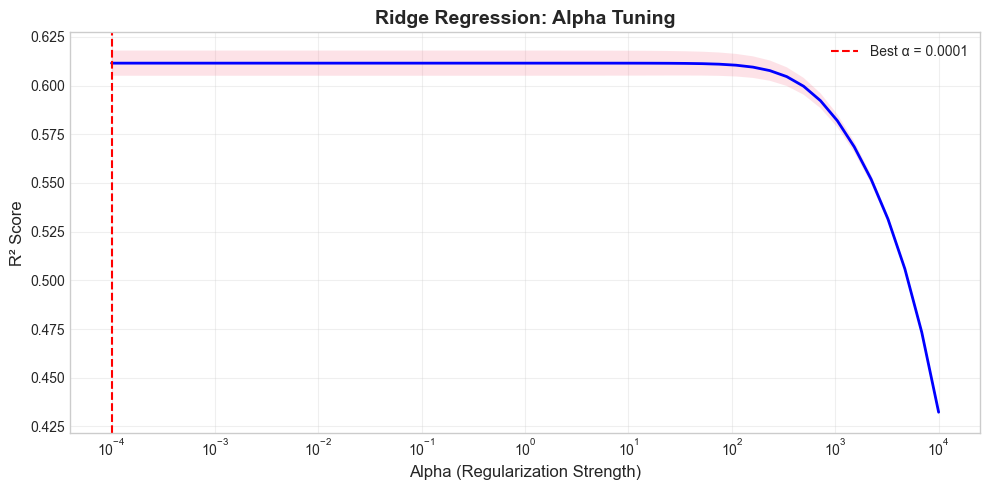

In [19]:
# Visualize Ridge alpha tuning
plt.figure(figsize=(10, 5))

cv_results = ridge_cv.cv_results_
plt.semilogx(alphas, cv_results['mean_test_score'], 'b-', linewidth=2)
plt.fill_between(alphas, 
                 cv_results['mean_test_score'] - cv_results['std_test_score'],
                 cv_results['mean_test_score'] + cv_results['std_test_score'],
                 alpha=0.2)

plt.axvline(ridge_cv.best_params_['alpha'], color='red', linestyle='--', 
            label=f"Best α = {ridge_cv.best_params_['alpha']:.4f}")

plt.xlabel('Alpha (Regularization Strength)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Ridge Regression: Alpha Tuning', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 Lasso Regression

In [20]:
# Find optimal alpha using GridSearchCV
alphas_lasso = np.logspace(-4, 1, 50)

lasso_cv = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': alphas_lasso},
    cv=5,
    scoring='r2'
)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Best Alpha for Lasso: {lasso_cv.best_params_['alpha']:.6f}")
print(f"Best CV R² Score: {lasso_cv.best_score_:.4f}")

Best Alpha for Lasso: 0.000655
Best CV R² Score: 0.6115


In [21]:
# Train Lasso with best alpha
lasso_model = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# CV scores
cv_scores_lasso = cross_val_score(lasso_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Lasso Regression Results:")
print(f"Cross-validation R² scores: {cv_scores_lasso.round(4)}")
print(f"Mean CV R² score: {cv_scores_lasso.mean():.4f} (+/- {cv_scores_lasso.std()*2:.4f})")

Lasso Regression Results:
Cross-validation R² scores: [0.62   0.613  0.6134 0.6108 0.6004]
Mean CV R² score: 0.6115 (+/- 0.0127)


In [22]:
# Features selected by Lasso (non-zero coefficients)
lasso_coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
})

print("Lasso Feature Selection:")
print(f"Features with non-zero coefficients: {(lasso_model.coef_ != 0).sum()}/{len(lasso_model.coef_)}")
print("\nFeature Coefficients:")
lasso_coef.sort_values('Coefficient', key=abs, ascending=False)

Lasso Feature Selection:
Features with non-zero coefficients: 8/8

Feature Coefficients:


,Feature,Coefficient
6,Latitude,-0.889634
7,Longitude,-0.862129
0,MedInc,0.850956
3,AveBedrms,0.330616
2,AveRooms,-0.285817
1,HouseAge,0.123072
5,AveOccup,-0.040214
4,Population,-0.001491


---
## 6. Model Evaluation & Comparison

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    }

# Evaluate all models
results = []
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))
results.append(evaluate_model(y_test, y_pred_ridge, 'Ridge Regression'))
results.append(evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'))

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index('Model')

print("Model Comparison:")
comparison_df.round(4)

Model Comparison:


,MSE,RMSE,MAE,R² Score
Model,,,,
Linear Regression,0.5559,0.7456,0.5332,0.5758
Ridge Regression,0.5559,0.7456,0.5332,0.5758
Lasso Regression,0.5550,0.7450,0.5332,0.5765


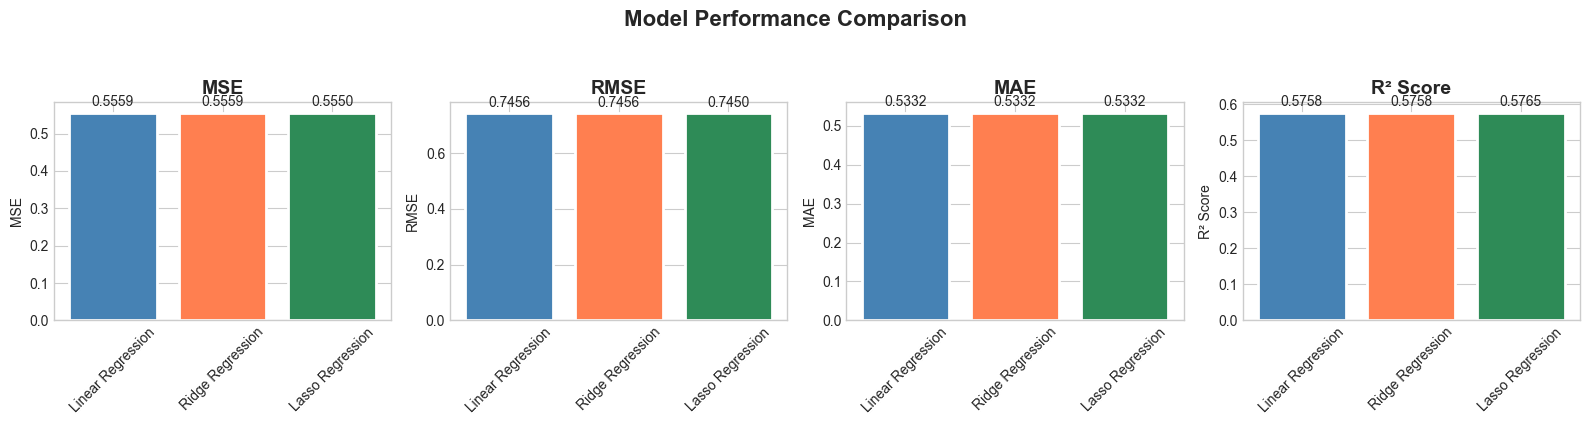

In [24]:
# Visualize comparison
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
colors = ['steelblue', 'coral', 'seagreen']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    bars = axes[i].bar(comparison_df.index, values, color=colors, edgecolor='white', linewidth=2)
    axes[i].set_title(metric, fontsize=14, fontweight='bold')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar, val in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                     f'{val:.4f}', ha='center', va='bottom', fontsize=10)

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

### 6.1 Actual vs Predicted

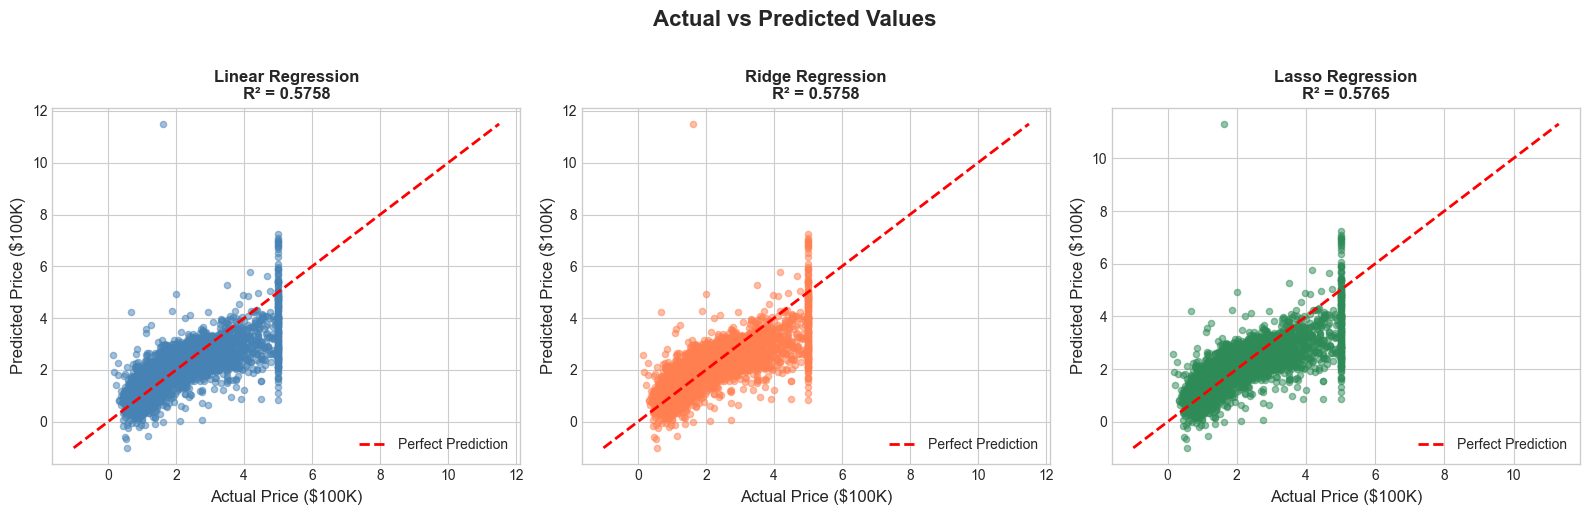

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
predictions = [y_pred_lr, y_pred_ridge, y_pred_lasso]
colors = ['steelblue', 'coral', 'seagreen']

for ax, model, pred, color in zip(axes, models, predictions, colors):
    ax.scatter(y_test, pred, alpha=0.5, s=20, c=color)
    
    # Perfect prediction line
    min_val = min(y_test.min(), pred.min())
    max_val = max(y_test.max(), pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Price ($100K)', fontsize=12)
    ax.set_ylabel('Predicted Price ($100K)', fontsize=12)
    ax.set_title(f'{model}\nR² = {r2_score(y_test, pred):.4f}', fontsize=12, fontweight='bold')
    ax.legend()

plt.suptitle('Actual vs Predicted Values', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.2 Residuals Analysis

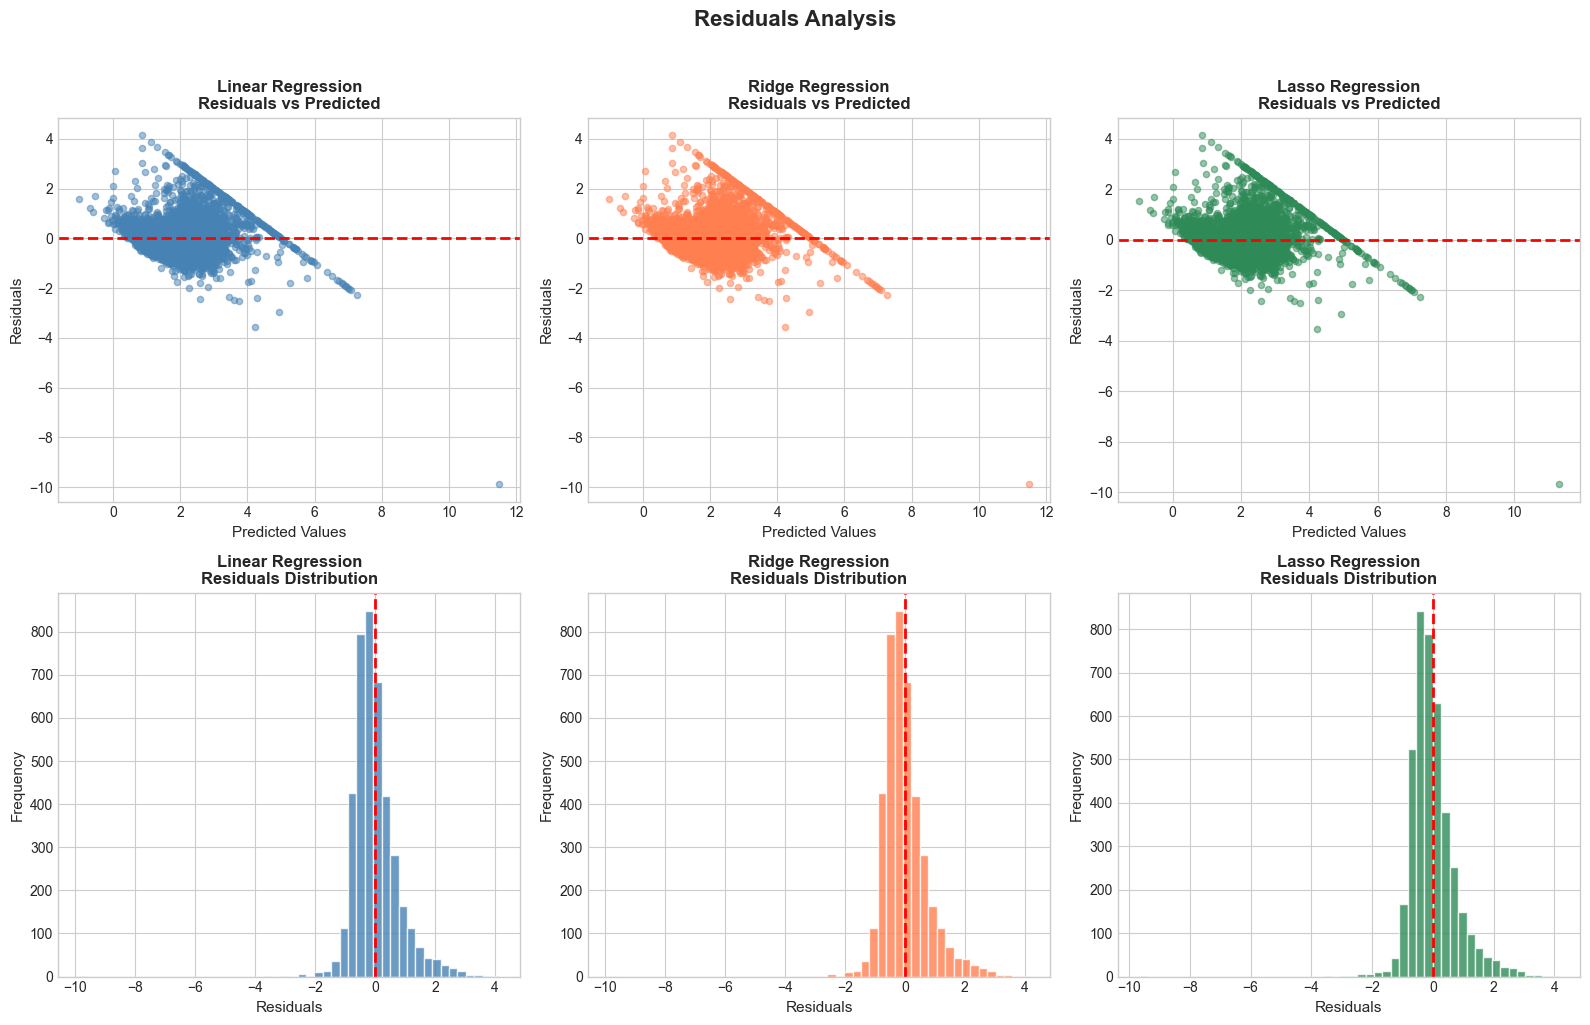

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, (model, pred, color) in enumerate(zip(models, predictions, colors)):
    residuals = y_test - pred
    
    # Residuals vs Predicted
    axes[0, i].scatter(pred, residuals, alpha=0.5, s=20, c=color)
    axes[0, i].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0, i].set_xlabel('Predicted Values', fontsize=11)
    axes[0, i].set_ylabel('Residuals', fontsize=11)
    axes[0, i].set_title(f'{model}\nResiduals vs Predicted', fontsize=12, fontweight='bold')
    
    # Residuals distribution
    axes[1, i].hist(residuals, bins=50, color=color, edgecolor='white', alpha=0.8)
    axes[1, i].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[1, i].set_xlabel('Residuals', fontsize=11)
    axes[1, i].set_ylabel('Frequency', fontsize=11)
    axes[1, i].set_title(f'{model}\nResiduals Distribution', fontsize=12, fontweight='bold')

plt.suptitle('Residuals Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.3 Feature Importance Comparison

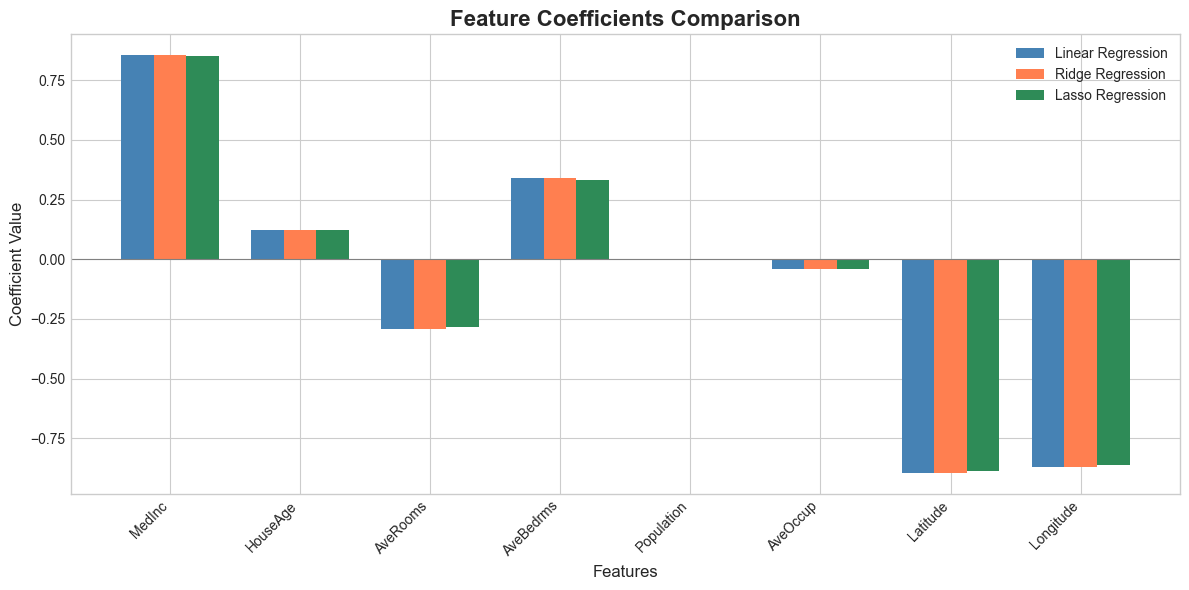


Coefficient Values:


,Feature,Linear Regression,Ridge Regression,Lasso Regression
0,MedInc,0.8544,0.8544,0.8510
1,HouseAge,0.1225,0.1225,0.1231
2,AveRooms,-0.2944,-0.2944,-0.2858
3,AveBedrms,0.3393,0.3393,0.3306
4,Population,-0.0023,-0.0023,-0.0015
5,AveOccup,-0.0408,-0.0408,-0.0402
6,Latitude,-0.8969,-0.8969,-0.8896
7,Longitude,-0.8698,-0.8698,-0.8621


In [27]:
# Compare coefficients across models
coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr_model.coef_,
    'Ridge Regression': ridge_model.coef_,
    'Lasso Regression': lasso_model.coef_
})

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(X.columns))
width = 0.25

bars1 = ax.bar(x - width, coef_comparison['Linear Regression'], width, label='Linear Regression', color='steelblue')
bars2 = ax.bar(x, coef_comparison['Ridge Regression'], width, label='Ridge Regression', color='coral')
bars3 = ax.bar(x + width, coef_comparison['Lasso Regression'], width, label='Lasso Regression', color='seagreen')

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Coefficient Value', fontsize=12)
ax.set_title('Feature Coefficients Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(X.columns, rotation=45, ha='right')
ax.legend()
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\nCoefficient Values:")
coef_comparison.round(4)

---
## 7. Kết luận

In [28]:
# Final summary
print("="*70)
print("KẾT LUẬN - HOUSE PRICE PREDICTION")
print("="*70)

print("\nKết quả so sánh các mô hình:")
print(comparison_df.round(4).to_string())

# Find best model
best_model_r2 = comparison_df['R² Score'].idxmax()
best_model_rmse = comparison_df['RMSE'].idxmin()

print(f"\nMô hình tốt nhất (theo R² Score): {best_model_r2}")
print(f"- R² Score: {comparison_df.loc[best_model_r2, 'R² Score']:.4f}")
print(f"- RMSE: ${comparison_df.loc[best_model_r2, 'RMSE']*100:.2f}K")

print("\nNhận xét:")
print("1. Cả 3 mô hình đều cho kết quả tương đương nhau")
print("2. MedInc (thu nhập trung bình) là feature quan trọng nhất")
print("3. Vị trí địa lý (Latitude, Longitude) cũng ảnh hưởng đáng kể")
print("4. Ridge và Lasso giúp regularization nhưng không cải thiện đáng kể")
print("do dataset không có nhiều multicollinearity nghiêm trọng")

print("\nKhuyến nghị:")
print("- Sử dụng Linear Regression cho đơn giản và dễ giải thích")
print("- Sử dụng Ridge nếu muốn ổn định hơn với regularization")
print("- Có thể thử các mô hình phức tạp hơn (Random Forest, XGBoost)")
print("để cải thiện performance")

print("\n" + "="*70)

KẾT LUẬN - HOUSE PRICE PREDICTION

Kết quả so sánh các mô hình:
                      MSE    RMSE     MAE  R² Score
Model                                              
Linear Regression  0.5559  0.7456  0.5332    0.5758
Ridge Regression   0.5559  0.7456  0.5332    0.5758
Lasso Regression   0.5550  0.7450  0.5332    0.5765

Mô hình tốt nhất (theo R² Score): Lasso Regression
- R² Score: 0.5765
- RMSE: $74.50K

Nhận xét:
1. Cả 3 mô hình đều cho kết quả tương đương nhau
2. MedInc (thu nhập trung bình) là feature quan trọng nhất
3. Vị trí địa lý (Latitude, Longitude) cũng ảnh hưởng đáng kể
4. Ridge và Lasso giúp regularization nhưng không cải thiện đáng kể
do dataset không có nhiều multicollinearity nghiêm trọng

Khuyến nghị:
- Sử dụng Linear Regression cho đơn giản và dễ giải thích
- Sử dụng Ridge nếu muốn ổn định hơn với regularization
- Có thể thử các mô hình phức tạp hơn (Random Forest, XGBoost)
để cải thiện performance



In [29]:
# Sample predictions
print("Sample Predictions (using Linear Regression):")
print("-"*50)

sample_indices = np.random.choice(len(y_test), 5, replace=False)
sample_predictions = pd.DataFrame({
    'Actual Price': y_test.iloc[sample_indices].values * 100,
    'Predicted Price': y_pred_lr[sample_indices] * 100,
    'Error': (y_test.iloc[sample_indices].values - y_pred_lr[sample_indices]) * 100
})
sample_predictions['Actual Price'] = sample_predictions['Actual Price'].apply(lambda x: f'${x:.2f}K')
sample_predictions['Predicted Price'] = sample_predictions['Predicted Price'].apply(lambda x: f'${x:.2f}K')
sample_predictions['Error'] = sample_predictions['Error'].apply(lambda x: f'{x:+.2f}K')

sample_predictions

Sample Predictions (using Linear Regression):
--------------------------------------------------


,Actual Price,Predicted Price,Error
0,$436.10K,$275.62K,+160.48K
1,$92.00K,$141.44K,-49.44K
2,$135.00K,$216.02K,-81.02K
3,$144.00K,$201.94K,-57.94K
4,$121.00K,$203.53K,-82.53K
